In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv('/content/drive/MyDrive/train_s3TEQDk.csv')
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df1.shape

(245725, 11)

In [5]:
df1.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [6]:
df1.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [7]:
df1.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [8]:
df1.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [9]:
df1.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [10]:
df1.Credit_Product.isnull().sum()

29325

In [11]:
df1.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [12]:
df1.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [13]:
df1.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,FJT6ADUM,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [14]:
df1.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [15]:
num_col=df1.select_dtypes(np.number)
num_col

,Age,Vintage,Avg_Account_Balance,Is_Lead
0,73,43,1045696,0
1,30,32,581988,0
2,56,26,1484315,0
3,34,19,470454,0
4,30,33,886787,0
...,...,...,...,...
245720,51,109,1925586,0
245721,27,15,862952,0
245722,26,13,670659,0
245723,28,31,407504,0


In [16]:
num_col.skew()

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

In [17]:
missingdata = pd.DataFrame(round(df1.isnull().sum()/len(df1),2)*100, columns= ['Percentage of missing data'])

missingdata

,Percentage of missing data
ID,0.0
Gender,0.0
Age,0.0
Region_Code,0.0
Occupation,0.0
Channel_Code,0.0
Vintage,0.0
Credit_Product,12.0
Avg_Account_Balance,0.0
Is_Active,0.0


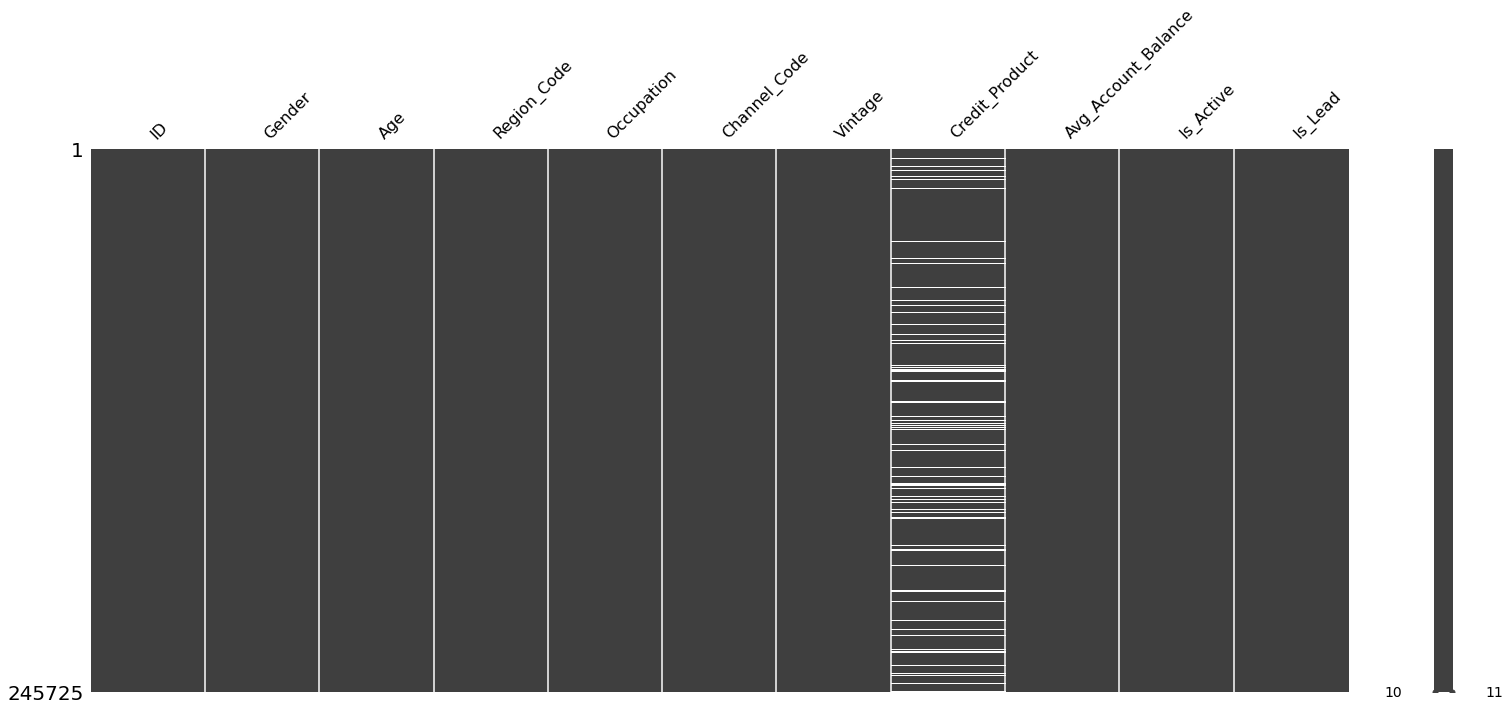

In [18]:
import missingno as msno
msno.matrix(df1)

In [19]:
df1['Credit_Product'].mode()

0    No
dtype: object

In [20]:
df1.Credit_Product.fillna('No',inplace=True)
df1.Credit_Product.value_counts()

No     173682
Yes     72043
Name: Credit_Product, dtype: int64

In [21]:
df1.Credit_Product.isnull().sum()

0

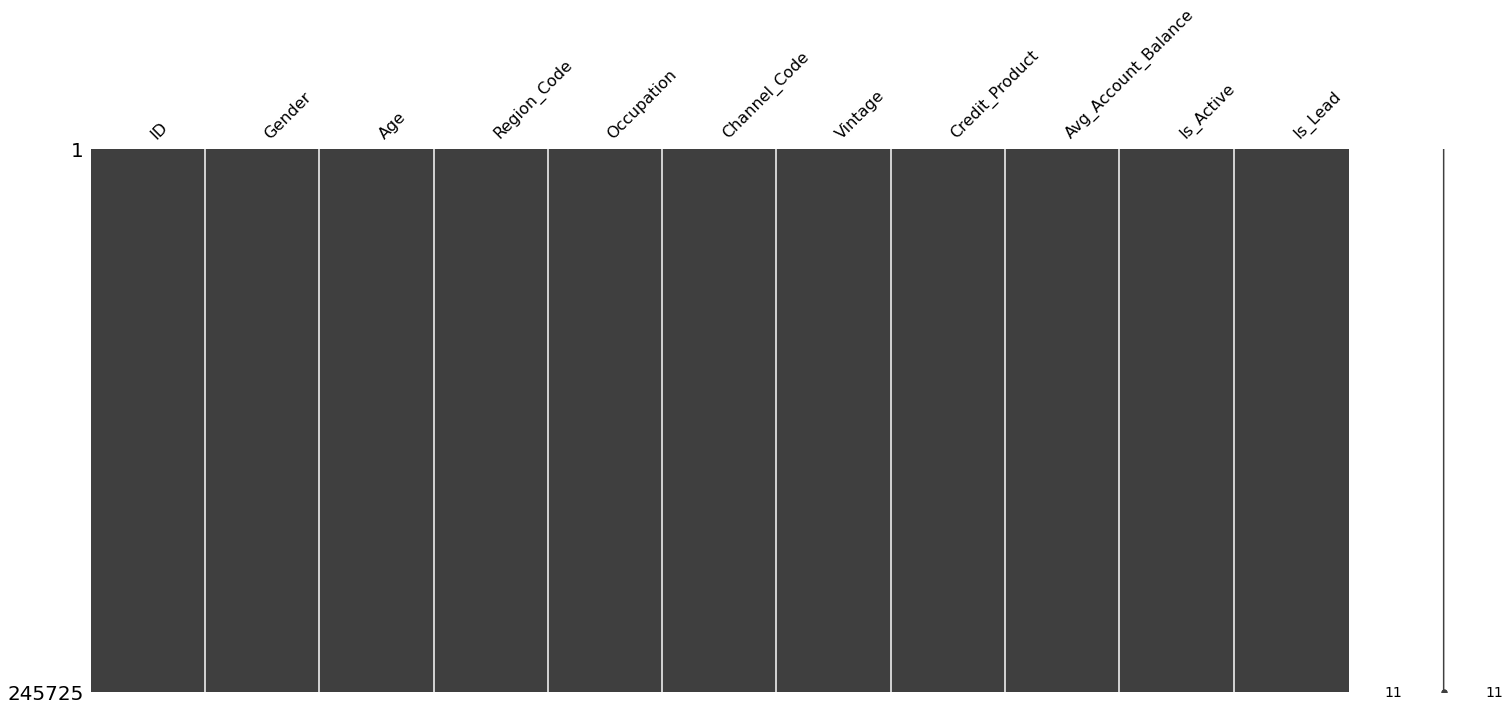

In [22]:
import missingno as msno
msno.matrix(df1)

<Figure size 1080x576 with 0 Axes>

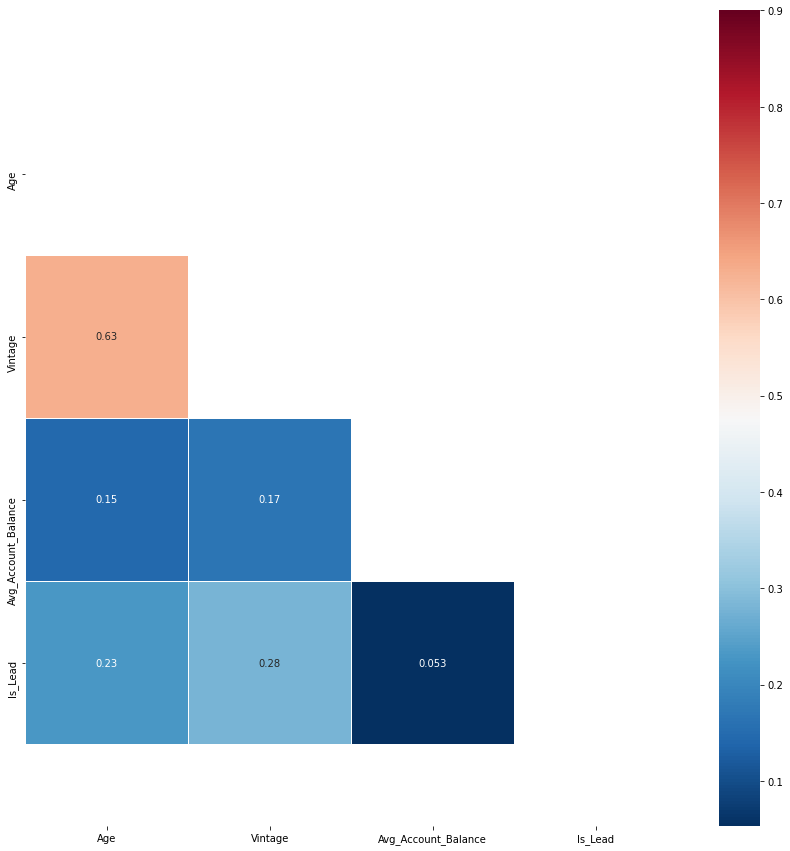

In [23]:
plt.figure(figsize=(15,8))
mask=np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)]=1
fig,ax= plt.subplots()
fig.set_size_inches(15,15)

sns.heatmap(df1.corr(),annot=True,mask=mask,square=True,linewidths=0.1,linecolor='white',vmax = .9,cmap = 'RdBu_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

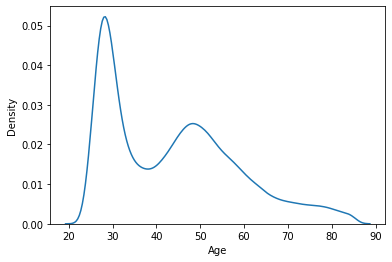

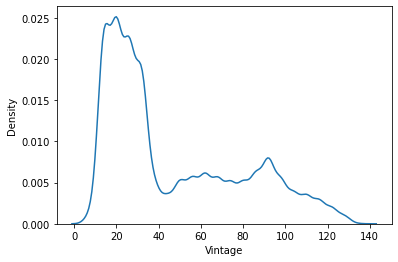

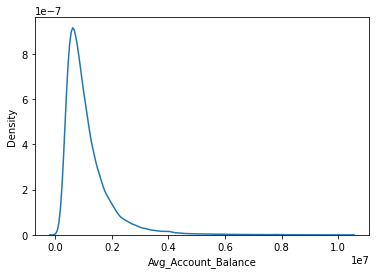

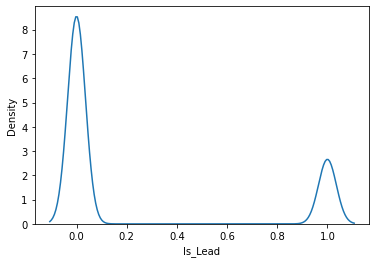

In [24]:
for i in num_col.columns:
    sns.kdeplot(df1[i])
    plt.show()

In [25]:
from scipy.stats import shapiro

skewness of  Age : 0.6189922275209511
test for normality of  Age (0.9299122095108032, 0.0)


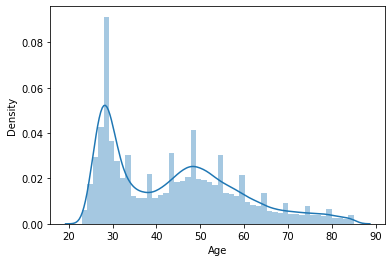


skewness of  Vintage : 0.7901885721179357
test for normality of  Vintage (0.8692406415939331, 0.0)


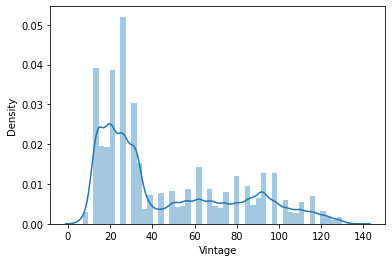


skewness of  Avg_Account_Balance : 2.968726515557337
test for normality of  Avg_Account_Balance (0.7478618621826172, 0.0)


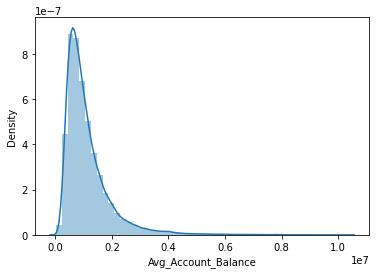


skewness of  Is_Lead : 1.2355959031537753
test for normality of  Is_Lead (0.5271826982498169, 0.0)


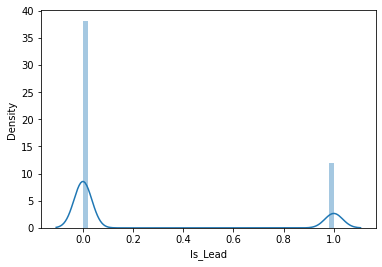

In [26]:
for i in num_col:
    print("skewness of ",i,":",df1[i].skew())
    print("test for normality of ",i,shapiro(df1[i]))
    sns.distplot(df1[i])
    plt.show()
    print()

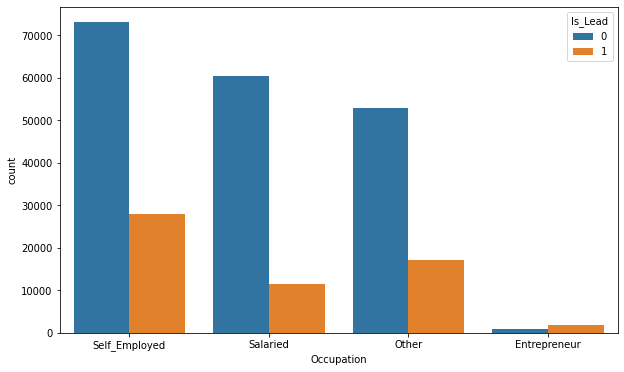

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Occupation',order=df1.Occupation.value_counts().index,hue=df1['Is_Lead'])
plt.show()

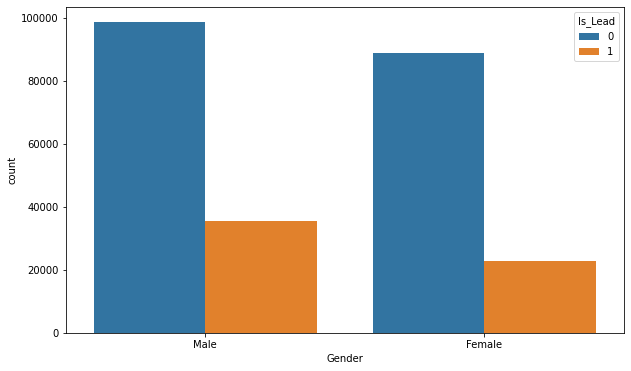

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df1,x='Gender',order=df1.Gender.value_counts().index,hue=df1['Is_Lead'])
plt.show()

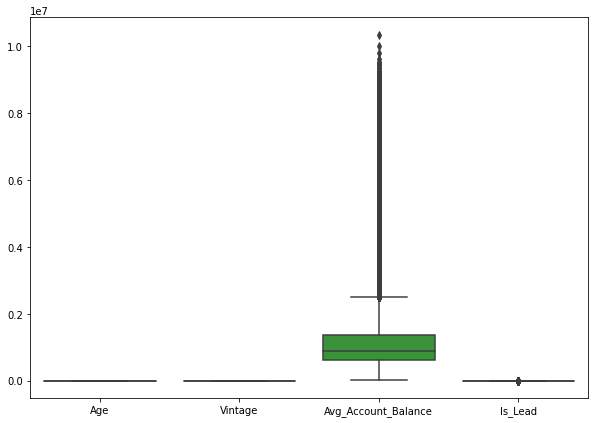

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(data=num_col)
plt.show()

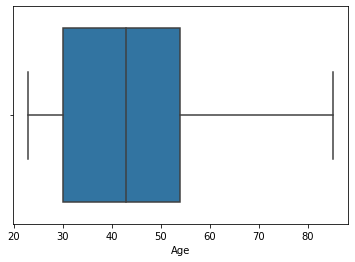

In [30]:
sns.boxplot(df1['Age'])
plt.show()

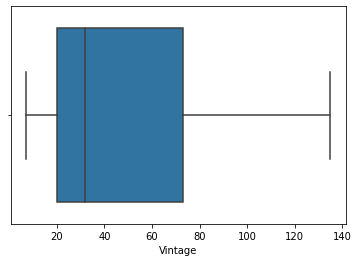

In [31]:
sns.boxplot(df1['Vintage'])
plt.show()

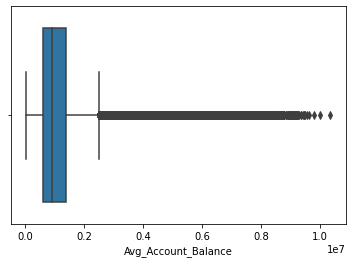

In [32]:
sns.boxplot(df1['Avg_Account_Balance'])
plt.show()

In [33]:
df1.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


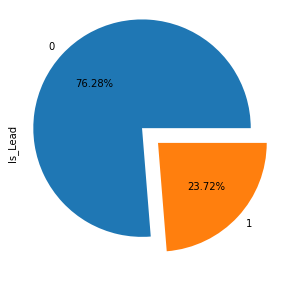

In [34]:
plt.figure(figsize=(5,5))
df1['Is_Lead'].value_counts(normalize=True).plot(kind='pie',labels=df1['Is_Lead'].value_counts().index,autopct="%1.2f%%",explode=[0.2,0])
plt.show()

In [35]:
x=df1[['Age','Vintage','Avg_Account_Balance']]
y=df1['Is_Lead'].astype('category')

In [36]:
from sklearn.preprocessing import PowerTransformer

In [37]:
pt=PowerTransformer()

In [38]:
x_t=pt.fit_transform(x)
x_t

array([[ 1.62724579,  0.25288492,  0.23963912],
       [-0.97562246, -0.16772519, -0.72840438],
       [ 0.9136001 , -0.47030237,  0.78781586],
       ...,
       [-1.45218364, -1.51600518, -0.48810277],
       [-1.20331611, -0.2136271 , -1.34996008],
       [-1.08702566, -0.78710913,  0.36188224]])

In [39]:
cat=df1[['ID','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']]
cat

,ID,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,NNVBBKZB,Female,Other,X3,No,No
1,IDD62UNG,Female,Salaried,X1,No,No
2,HD3DSEMC,Female,Self_Employed,X3,No,Yes
3,BF3NC7KV,Male,Salaried,X1,No,No
4,TEASRWXV,Female,Salaried,X1,No,No
...,...,...,...,...,...,...
245720,BPAWWXZN,Male,Self_Employed,X3,No,No
245721,HFNB7JY8,Male,Salaried,X1,No,Yes
245722,GEHAUCWT,Female,Salaried,X1,No,No
245723,GE7V8SAH,Female,Salaried,X1,No,No


In [40]:
d_t=pd.DataFrame(x_t,columns=x.columns)

In [41]:
d_t

,Age,Vintage,Avg_Account_Balance
0,1.627246,0.252885,0.239639
1,-0.975622,-0.167725,-0.728404
2,0.913600,-0.470302,0.787816
3,-0.572322,-0.937368,-1.096365
4,-0.975622,-0.123364,-0.026086
...,...,...,...
245720,0.649574,1.495077,1.181054
245721,-1.324888,-1.296317,-0.070497
245722,-1.452184,-1.516005,-0.488103
245723,-1.203316,-0.213627,-1.349960


In [42]:
x_c = pd.concat([d_t, cat], axis=1,join='inner')
x_c

,Age,Vintage,Avg_Account_Balance,ID,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,1.627246,0.252885,0.239639,NNVBBKZB,Female,Other,X3,No,No
1,-0.975622,-0.167725,-0.728404,IDD62UNG,Female,Salaried,X1,No,No
2,0.913600,-0.470302,0.787816,HD3DSEMC,Female,Self_Employed,X3,No,Yes
3,-0.572322,-0.937368,-1.096365,BF3NC7KV,Male,Salaried,X1,No,No
4,-0.975622,-0.123364,-0.026086,TEASRWXV,Female,Salaried,X1,No,No
...,...,...,...,...,...,...,...,...,...
245720,0.649574,1.495077,1.181054,BPAWWXZN,Male,Self_Employed,X3,No,No
245721,-1.324888,-1.296317,-0.070497,HFNB7JY8,Male,Salaried,X1,No,Yes
245722,-1.452184,-1.516005,-0.488103,GEHAUCWT,Female,Salaried,X1,No,No
245723,-1.203316,-0.213627,-1.349960,GE7V8SAH,Female,Salaried,X1,No,No


In [43]:
x_f=x_c.drop('ID',axis=1)
x_f.head()

,Age,Vintage,Avg_Account_Balance,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,1.627246,0.252885,0.239639,Female,Other,X3,No,No
1,-0.975622,-0.167725,-0.728404,Female,Salaried,X1,No,No
2,0.913600,-0.470302,0.787816,Female,Self_Employed,X3,No,Yes
3,-0.572322,-0.937368,-1.096365,Male,Salaried,X1,No,No
4,-0.975622,-0.123364,-0.026086,Female,Salaried,X1,No,No


In [44]:
x_d=pd.get_dummies(data=x_f,columns=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],drop_first=True)
x_d.head()


,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,1.627246,0.252885,0.239639,0,1,0,0,0,1,0,0,0
1,-0.975622,-0.167725,-0.728404,0,0,1,0,0,0,0,0,0
2,0.913600,-0.470302,0.787816,0,0,0,1,0,1,0,0,1
3,-0.572322,-0.937368,-1.096365,1,0,1,0,0,0,0,0,0
4,-0.975622,-0.123364,-0.026086,0,0,1,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_d,y,test_size=0.3,random_state=1)

In [46]:
print('the shape of train_X: {}'.format(x_train.shape)) 
print('the shape of train_y: {} \n'.format(y_train.shape))
print('the shape of test_X: {}'.format(x_test.shape)) 
print('the shape of test_y: {} \n'.format(y_test.shape))

the shape of train_X: (172007, 12)
the shape of train_y: (172007,) 

the shape of test_X: (73718, 12)
the shape of test_y: (73718,) 



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
LR=LogisticRegression(solver='liblinear')

LR.fit(x_train,y_train)

y_prob_train = LR.predict_proba(x_train)[:,1]
y_pred_train = LR.predict (x_train)

print('Classification report ' , '\n', classification_report(y_train, y_pred_train))

y_prob = LR.predict_proba(x_test)[:,1]
y_pred = LR.predict (x_test)

print('Classification report','\n', classification_report(y_test, y_pred))


Classification report  
               precision    recall  f1-score   support

           0       0.78      0.99      0.87    131056
           1       0.80      0.10      0.18     40951

    accuracy                           0.78    172007
   macro avg       0.79      0.55      0.53    172007
weighted avg       0.79      0.78      0.71    172007

Classification report 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87     56381
           1       0.80      0.10      0.18     17337

    accuracy                           0.78     73718
   macro avg       0.79      0.55      0.53     73718
weighted avg       0.79      0.78      0.71     73718



In [48]:
roc_auc_score(y_train,y_pred_train)

0.5478632308578537

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV,StratifiedKFold
from sklearn.feature_selection import RFE
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

param_dist={'n_estimators':sp_randint(25,250),'max_features':sp_randint(1,10),'max_depth':sp_randint(2,15),
           'min_samples_leaf':sp_randint(1,20),'min_samples_split':sp_randint(2,50),'criterion':['gini','entropy']}

r_search=RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, scoring='roc_auc', n_iter=10,cv=3,n_jobs=-1,random_state=4)

print(r_search.fit(x_d,y))
print(r_search.best_params_)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
rfc=RandomForestClassifier(**r_search.best_params_,random_state=4)
rfc.fit(x_d,y)

y_train_pred1=rfc.predict(x_d)
y_train_prob1=rfc.predict_proba(x_d)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y,y_train_pred1))
print('train - accuracy score : ','\n', accuracy_score(y,y_train_pred1))
print('train - AUC : ', roc_auc_score(y,y_train_prob1))

train - confusion matrix :  
 [[181286   6151]
 [ 41466  16822]]
train - accuracy score :  
 0.8062183335028996
train - AUC :  0.8140283905636599


In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=24)
gbc.fit(x_d,y)

y_train_pred=gbc.predict(x_d)
y_train_prob=gbc.predict_proba(x_d)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y,y_train_pred))
print('train - AUC : ', roc_auc_score(y,y_train_prob))

train - confusion matrix :  
 [[187265    172]
 [ 53453   4835]]
train - accuracy score :  
 0.7817682368501373
train - AUC :  0.7702224206826584


In [79]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [88]:
gbc=GradientBoostingClassifier()

params={'n_estimators':sp_randint(50,250),'max_depth':sp_randint(1,15),
        'learning_rate':sp_uniform(0,0.5),'learning_rate':range(0,2)}

r_search=RandomizedSearchCV(estimator=gbc,param_distributions=params,cv=3,n_iter=10,scoring='roc_auc',
                           random_state=4,n_jobs=-1)

print(r_search.fit(x_d,y))
print(r_search.best_params_)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [89]:
gbc=GradientBoostingClassifier(**r_search.best_params_,random_state=4)
gbc.fit(x_d,y)
y_train_pred=gbc.predict(x_d)
y_train_prob=gbc.predict_proba(x_d)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y,y_train_pred))
print('train - AUC : ', roc_auc_score(y,y_train_prob))

train - confusion matrix :  
 [[180871   6566]
 [ 46241  12047]]
train - accuracy score :  
 0.7850971614609829
train - AUC :  0.7632308402004261


In [90]:
y_test_pred3=gbc.predict(x_d1)
y_test_pred3

array([0, 0, 0, ..., 0, 1, 0])

In [91]:
d5=pd.DataFrame(a)
d5

,ID
0,VBENBARO
1,CCMEWNKY
2,VK3KGA9M
3,TT8RPZVC
4,SHQZEYTZ
...,...
105307,DBENJOYI
105308,CWQ72DWS
105309,HDESC8GU
105310,2PW4SFCA


In [92]:
d5['Is_Lead']=y_test_pred3

In [52]:
df2=pd.read_csv('/content/drive/MyDrive/test_mSzZ8RL.csv')
df2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [53]:
df2.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [54]:
df2['Credit_Product'].value_counts()

No     61608
Yes    31182
Name: Credit_Product, dtype: int64

In [55]:
df2['Credit_Product'].mode()

0    No
dtype: object

In [56]:
df2.Credit_Product.fillna('No',inplace=True)

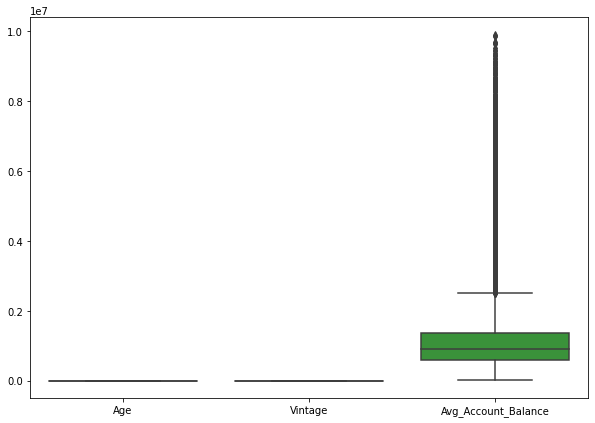

In [57]:
num_col1=df2.select_dtypes(np.number)
plt.figure(figsize=(10,7))
sns.boxplot(data=num_col1)
plt.show()

In [58]:
x_test=df2[['Age','Vintage','Avg_Account_Balance']]
x_t1=pt.fit_transform(x_test)
x_t1

array([[-1.08624895, -0.5244288 , -0.3196323 ],
       [ 0.15187044,  0.43786477,  0.04133094],
       [-0.86763855, -1.39692779, -2.5319142 ],
       ...,
       [-0.47930057, -1.29142701,  0.99057216],
       [ 0.75843208,  1.29522588, -0.3312724 ],
       [-1.32462104, -0.78311188, -0.70166656]])

In [59]:
cat1=df2[['ID','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']]
cat1

,ID,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,VBENBARO,Male,Other,X1,Yes,No
1,CCMEWNKY,Male,Other,X2,No,No
2,VK3KGA9M,Male,Salaried,X1,No,No
3,TT8RPZVC,Male,Other,X1,No,No
4,SHQZEYTZ,Female,Other,X1,No,No
...,...,...,...,...,...,...
105307,DBENJOYI,Male,Salaried,X2,Yes,Yes
105308,CWQ72DWS,Male,Other,X2,Yes,No
105309,HDESC8GU,Male,Salaried,X4,No,No
105310,2PW4SFCA,Male,Other,X3,No,Yes


In [60]:
d_t1=pd.DataFrame(x_t1,columns=x_test.columns)

In [61]:
d_t1.head()

,Age,Vintage,Avg_Account_Balance
0,-1.086249,-0.524429,-0.319632
1,0.151870,0.437865,0.041331
2,-0.867639,-1.396928,-2.531914
3,-1.086249,-0.120141,-0.062583
4,-1.086249,-0.933133,-0.523608


In [62]:
x_c1 = pd.concat([d_t1, cat1], axis=1,join='inner')
x_c1

,Age,Vintage,Avg_Account_Balance,ID,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,-1.086249,-0.524429,-0.319632,VBENBARO,Male,Other,X1,Yes,No
1,0.151870,0.437865,0.041331,CCMEWNKY,Male,Other,X2,No,No
2,-0.867639,-1.396928,-2.531914,VK3KGA9M,Male,Salaried,X1,No,No
3,-1.086249,-0.120141,-0.062583,TT8RPZVC,Male,Other,X1,No,No
4,-1.086249,-0.933133,-0.523608,SHQZEYTZ,Female,Other,X1,No,No
...,...,...,...,...,...,...,...,...,...
105307,0.704585,1.193719,2.283422,DBENJOYI,Male,Salaried,X2,Yes,Yes
105308,0.862347,1.193719,0.399771,CWQ72DWS,Male,Other,X2,Yes,No
105309,-0.479301,-1.291427,0.990572,HDESC8GU,Male,Salaried,X4,No,No
105310,0.758432,1.295226,-0.331272,2PW4SFCA,Male,Other,X3,No,Yes


In [63]:
x_f1=x_c1.drop('ID',axis=1)
x_f1.head()

,Age,Vintage,Avg_Account_Balance,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,-1.086249,-0.524429,-0.319632,Male,Other,X1,Yes,No
1,0.151870,0.437865,0.041331,Male,Other,X2,No,No
2,-0.867639,-1.396928,-2.531914,Male,Salaried,X1,No,No
3,-1.086249,-0.120141,-0.062583,Male,Other,X1,No,No
4,-1.086249,-0.933133,-0.523608,Female,Other,X1,No,No


In [64]:
x_d1=pd.get_dummies(data=x_f1,columns=['Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],drop_first=True)
x_d1.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,-1.086249,-0.524429,-0.319632,1,1,0,0,0,0,0,1,0
1,0.151870,0.437865,0.041331,1,1,0,0,1,0,0,0,0
2,-0.867639,-1.396928,-2.531914,1,0,1,0,0,0,0,0,0
3,-1.086249,-0.120141,-0.062583,1,1,0,0,0,0,0,0,0
4,-1.086249,-0.933133,-0.523608,0,1,0,0,0,0,0,0,0


In [65]:
y_test_pred1=rfc.predict(x_d1)
y_test_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
a=df2['ID']
a

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [70]:
d3=pd.DataFrame(a)
d3

,ID
0,VBENBARO
1,CCMEWNKY
2,VK3KGA9M
3,TT8RPZVC
4,SHQZEYTZ
...,...
105307,DBENJOYI
105308,CWQ72DWS
105309,HDESC8GU
105310,2PW4SFCA


In [71]:
d3['Is_Lead']=y_test_pred1

In [72]:
d3

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,1


In [74]:
d3.to_csv("drive/My Drive/lead_prediction.csv")

In [75]:
df2.shape

(105312, 10)

In [76]:
from sklearn.ensemble import VotingClassifier


In [80]:
soft_voting=VotingClassifier(estimators=[('random forest',rfc),('gradient boosting',gbc)],voting='soft')

In [82]:
soft_voting.fit(x_d, y)
y_pred_imp = soft_voting.predict(x_d)
y_prob_imp=soft_voting.predict_proba(x_d)[:,1]
print("Accuracy score: {}".format(accuracy_score(y, y_pred_imp)))
print("Train score: {}".format(soft_voting.score(x_d, y)))
print("Roc_score : ", roc_auc_score(y,y_prob_imp))
print(confusion_matrix(y,y_pred_imp), '\n')
print(classification_report(y,y_pred_imp))

Accuracy score: 0.7944612880252314
Train score: 0.7944612880252314
Roc_score :  0.8020839791263102
[[185445   1992]
 [ 48514   9774]] 

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    187437
           1       0.83      0.17      0.28     58288

    accuracy                           0.79    245725
   macro avg       0.81      0.58      0.58    245725
weighted avg       0.80      0.79      0.74    245725



In [83]:
y_test_pred2=soft_voting.predict(x_d1)
y_test_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
d4=pd.DataFrame(a)
d4

,ID
0,VBENBARO
1,CCMEWNKY
2,VK3KGA9M
3,TT8RPZVC
4,SHQZEYTZ
...,...
105307,DBENJOYI
105308,CWQ72DWS
105309,HDESC8GU
105310,2PW4SFCA


In [86]:
d4['Is_Lead']=y_test_pred2
d4

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [87]:
d4.to_csv("drive/My Drive/lead_prediction1.csv")

In [93]:
d5.to_csv("drive/My Drive/lead_prediction2.csv")